In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import missingno as msno

In [2]:
df = pd.read_csv('./dataset/Heart_preprocessed.csv')

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns without truncating
pd.set_option('display.max_rows', 50)      # Show up to 50 rows (adjust as necessary)
pd.set_option('display.width', 1000)       # Set the display width to prevent wrapping
pd.set_option('display.max_colwidth', None) # Allow full column width (no truncation)
pd.set_option('display.float_format', '{:,.2f}'.format)  # Display floats with two decimals

In [4]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,CalculatedBMI,GeneralHealth_missing_indicator,LastCheckupTime_missing_indicator,PhysicalActivities_missing_indicator,RemovedTeeth_missing_indicator,HadHeartAttack_missing_indicator,HadAngina_missing_indicator,HadStroke_missing_indicator,HadAsthma_missing_indicator,HadSkinCancer_missing_indicator,HadCOPD_missing_indicator,HadDepressiveDisorder_missing_indicator,HadKidneyDisease_missing_indicator,HadArthritis_missing_indicator,HadDiabetes_missing_indicator,DeafOrHardOfHearing_missing_indicator,BlindOrVisionDifficulty_missing_indicator,DifficultyConcentrating_missing_indicator,DifficultyWalking_missing_indicator,DifficultyDressingBathing_missing_indicator,DifficultyErrands_missing_indicator,SmokerStatus_missing_indicator,ECigaretteUsage_missing_indicator,RaceEthnicityCategory_missing_indicator,AgeCategory_missing_indicator,ChestScan_missing_indicator,AlcoholDrinkers_missing_indicator,HIVTesting_missing_indicator,FluVaxLast12_missing_indicator,PneumoVaxEver_missing_indicator,TetanusLast10Tdap_missing_indicator,HighRiskLastYear_missing_indicator,CovidPos_missing_indicator,ChronicConditionCount,ImpairmentCount,ComorbidityCount,AgeCategory_numeric,AgeCategory_Classification,AgeCategory_Classification_numeric,Sex_numeric,RaceEthnicityCategory_numeric,CalculatedBMI_Classification,CalculatedBMI_Classification_numeric,PhysicalHealthDays_Classification,PhysicalHealthDays_Classification_numeric,MentalHealthDays_Classification,MentalHealthDays_Classification_numeric,SleepHours_Classification,SleepHours_Classification_numeric,GeneralHealth_numeric,GeneralHealth_Classification,GeneralHealth_Classification_numeric
0,alabama,female,very good,0.00,0.00,0,0,8.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,white,age 80 or older,1.70,80.74,0,0,1,0,1,0,0,27.35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,13,older-adult,3,2,1,overweight,3,excellent,0,excellent,0,optimal,2,4,above average,1
1,alabama,female,excellent,0.00,0.00,0,0,6.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,age 80 or older,1.60,68.04,0,0,0,0,0,0,0,26.58,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,13,older-adult,3,2,1,overweight,3,excellent,0,excellent,0,low,1,5,above average,1
2,alabama,female,very good,2.00,3.00,0,1,5.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,age 55 to 59,1.57,63.50,0,0,0,0,0,0,1,25.76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,8,older-adult,3,2,1,overweight,3,good,1,good,1,low,1,4,above average,1
3,alabama,female,excellent,0.00,0.00,0,1,7.00,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,white,age 65 to 69,1.65,63.50,0,0,1,1,0,0,0,23.32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,2,10,older-adult,3,2,1,normal weight,2,excellent,0,excellent,0,optimal,2,5,above average,1
4,alabama,female,fair,2.00,0.00,0,1,9.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,white,age 40 to 44,1.57,54.43,1,0,0,1,0,0,0,21.90,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,middle-aged,2,2,1,normal weight,2,good,1,excellent,0,optimal,2,2,below average,0


In [5]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'CalculatedBMI', 'GeneralHealth_missing_indicator', 'LastCheckupTime_missing_indicator', 'PhysicalActivities_missing_indicator', 'RemovedTeeth_missing_indicator', 'HadHeartAttack_missing_indicator', 'HadAngina_missing_indicator', 'HadStroke_missing_indicator', 'HadAsthma_missing_indicator',


## Risk Score Feature

In [6]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,CalculatedBMI,GeneralHealth_missing_indicator,LastCheckupTime_missing_indicator,PhysicalActivities_missing_indicator,RemovedTeeth_missing_indicator,HadHeartAttack_missing_indicator,HadAngina_missing_indicator,HadStroke_missing_indicator,HadAsthma_missing_indicator,HadSkinCancer_missing_indicator,HadCOPD_missing_indicator,HadDepressiveDisorder_missing_indicator,HadKidneyDisease_missing_indicator,HadArthritis_missing_indicator,HadDiabetes_missing_indicator,DeafOrHardOfHearing_missing_indicator,BlindOrVisionDifficulty_missing_indicator,DifficultyConcentrating_missing_indicator,DifficultyWalking_missing_indicator,DifficultyDressingBathing_missing_indicator,DifficultyErrands_missing_indicator,SmokerStatus_missing_indicator,ECigaretteUsage_missing_indicator,RaceEthnicityCategory_missing_indicator,AgeCategory_missing_indicator,ChestScan_missing_indicator,AlcoholDrinkers_missing_indicator,HIVTesting_missing_indicator,FluVaxLast12_missing_indicator,PneumoVaxEver_missing_indicator,TetanusLast10Tdap_missing_indicator,HighRiskLastYear_missing_indicator,CovidPos_missing_indicator,ChronicConditionCount,ImpairmentCount,ComorbidityCount,AgeCategory_numeric,AgeCategory_Classification,AgeCategory_Classification_numeric,Sex_numeric,RaceEthnicityCategory_numeric,CalculatedBMI_Classification,CalculatedBMI_Classification_numeric,PhysicalHealthDays_Classification,PhysicalHealthDays_Classification_numeric,MentalHealthDays_Classification,MentalHealthDays_Classification_numeric,SleepHours_Classification,SleepHours_Classification_numeric,GeneralHealth_numeric,GeneralHealth_Classification,GeneralHealth_Classification_numeric
0,alabama,female,very good,0.00,0.00,0,0,8.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,white,age 80 or older,1.70,80.74,0,0,1,0,1,0,0,27.35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,13,older-adult,3,2,1,overweight,3,excellent,0,excellent,0,optimal,2,4,above average,1
1,alabama,female,excellent,0.00,0.00,0,0,6.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,age 80 or older,1.60,68.04,0,0,0,0,0,0,0,26.58,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,13,older-adult,3,2,1,overweight,3,excellent,0,excellent,0,low,1,5,above average,1
2,alabama,female,very good,2.00,3.00,0,1,5.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,age 55 to 59,1.57,63.50,0,0,0,0,0,0,1,25.76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,8,older-adult,3,2,1,overweight,3,good,1,good,1,low,1,4,above average,1
3,alabama,female,excellent,0.00,0.00,0,1,7.00,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,white,age 65 to 69,1.65,63.50,0,0,1,1,0,0,0,23.32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,2,10,older-adult,3,2,1,normal weight,2,excellent,0,excellent,0,optimal,2,5,above average,1
4,alabama,female,fair,2.00,0.00,0,1,9.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,white,age 40 to 44,1.57,54.43,1,0,0,1,0,0,0,21.90,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,middle-aged,2,2,1,normal weight,2,good,1,excellent,0,optimal,2,2,below average,0


observe discrepancies between various demographics eg. state, sex, agecategroy, raceecthnicitycategory. then update risk score accordingly. 

In [7]:
# ------------------------------ CalculatedBMI_penalty ------------------------------
def calculate_bmi_penalty(bmi_class):
    if bmi_class == 'anorexic':
        return 10
    elif bmi_class == 'underweight':
        return 1
    elif bmi_class == 'normal weight':
        return 0
    elif bmi_class == 'overweight':
        return 1
    elif bmi_class == 'morbid obesity':
        return 10
    return 0  # Default penalty if classification is missing

df['CalculatedBMI_penalty'] = df['CalculatedBMI_Classification'].apply(calculate_bmi_penalty)



# ------------------------------ PhysicalHealthDays_penalty ------------------------------
def calculate_physicalhealthdays_penalty(physicalhealthdays):
    if physicalhealthdays == 'excellent':
        return 0
    elif physicalhealthdays == 'good':
        return 0
    elif physicalhealthdays == 'fair':
        return 1
    elif physicalhealthdays == 'poor':
        return 5
    elif physicalhealthdays == 'very poor':
        return 10
    return 0  # Default penalty if classification is missing

df['PhysicalHealthDays_penalty'] = df['PhysicalHealthDays_Classification'].apply(calculate_physicalhealthdays_penalty)



# ------------------------------ MentalHealthDays_penalty ------------------------------
def calculate_mentalhealthdays_penalty(mentalhealthdays):
    if mentalhealthdays == 'excellent':
        return 0
    elif mentalhealthdays == 'good':
        return 0
    elif mentalhealthdays == 'fair':
        return 1
    elif mentalhealthdays == 'poor':
        return 5
    elif mentalhealthdays == 'very poor':
        return 10
    return 0  # Default penalty if classification is missing

df['MentalHealthDays_penalty'] = df['MentalHealthDays_Classification'].apply(calculate_mentalhealthdays_penalty)



# ------------------------------ SleepHours_Classification_numeric_penalty ------------------------------
def calculate_sleephours_classification_numeric_penalty(sleephours_classification_numeric):
    if sleephours_classification_numeric == 0:
        return 50
    elif sleephours_classification_numeric == 1:
        return 1
    elif sleephours_classification_numeric == 2:
        return 0
    elif sleephours_classification_numeric == 3:
        return 1
    return 0  # Default penalty

df['SleepHours_Classification_numeric_penalty'] = df['SleepHours_Classification_numeric'].apply(calculate_sleephours_classification_numeric_penalty)




# ------------------------------ All other penalties ------------------------------
df['LastCheckupTime_penalty'] = df['LastCheckupTime'].apply(lambda x: 0 if x == 0
                                                    else 1 if x == 1
                                                    else 2 if x == 2
                                                    else 10)

df['RemovedTeeth_penalty'] = df['RemovedTeeth'].apply(lambda x: 0 if x == 0 else 1 if x == 1 else 2 if x == 2 else 3)
df['SmokerStatus_penalty'] = df['SmokerStatus'].apply(lambda x: 0 if x == 0
                                              else 1 if x == 1
                                              else 2 if x == 2
                                              else 10)

df['ECigaretteUsage_penalty'] = df['ECigaretteUsage'].apply(lambda x: 0 if x == 0 else 1 if x == 1 else 2 if x == 2 else 10)
df['TetanusLast10Tdap_penalty'] = df['TetanusLast10Tdap'].apply(lambda x: 3 if x == 0 else 2 if x == 1 else 1 if x == 2 else 0)
df['PhysicalActivities_penalty'] = df['PhysicalActivities'].apply(lambda x: 3 if x == 0 else 0)
df['AlcoholDrinkers_penalty'] = df['AlcoholDrinkers'].apply(lambda x: 1 if x == 1 else 0)
df['HIVTesting_penalty'] = df['HIVTesting'].apply(lambda x: 5 if x == 1 else 0)
df['FluVaxLast12_penalty'] = df['FluVaxLast12'].apply(lambda x: 0 if x == 1 else 1)
df['PneumoVaxEver_penalty'] = df['PneumoVaxEver'].apply(lambda x: 0 if x == 1 else 1)
df['HighRiskLastYear_penalty'] = df['HighRiskLastYear'].apply(lambda x: 8 if x == 1 else 0)
df['ChestScan_penalty'] = df['ChestScan'].apply(lambda x: 0 if x == 1 else 1)


# Computing RiskScore
df['RiskScore'] = (
    (df['ComorbidityCount'] * 2) +
    df['CalculatedBMI_penalty'] +
    df['SleepHours_Classification_numeric_penalty'] +
    df['LastCheckupTime_penalty'] +
    df['RemovedTeeth_penalty'] +
    df['SmokerStatus_penalty'] +
    df['ECigaretteUsage_penalty'] +
    df['TetanusLast10Tdap_penalty'] +
    df['PhysicalActivities_penalty'] +
    df['AlcoholDrinkers_penalty'] +
    df['HIVTesting_penalty'] +
    df['FluVaxLast12_penalty'] +
    df['PneumoVaxEver_penalty'] +
    df['HighRiskLastYear_penalty'] +
    df['ChestScan_penalty']
)



def classify_risk(score):
    if score['RiskScore'] >= 20: 
        return 'High'
    elif 10 <= score['RiskScore'] < 20:
        return 'Moderate'
    else:
        return 'Low'


# Apply classification function to populate RiskClassification
df['RiskClassification'] = df.apply(classify_risk, axis=1)




Note: df['CovidPos'].apply(lambda x: 1 if x == 'yes' else 0) is not included in risk score. Because if someone was Covid Positive it will be hard to determine whether it increases their risk or strengthens immunity thus lowering risk.

In [8]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,CalculatedBMI,GeneralHealth_missing_indicator,LastCheckupTime_missing_indicator,PhysicalActivities_missing_indicator,RemovedTeeth_missing_indicator,HadHeartAttack_missing_indicator,HadAngina_missing_indicator,HadStroke_missing_indicator,HadAsthma_missing_indicator,HadSkinCancer_missing_indicator,HadCOPD_missing_indicator,HadDepressiveDisorder_missing_indicator,HadKidneyDisease_missing_indicator,HadArthritis_missing_indicator,HadDiabetes_missing_indicator,DeafOrHardOfHearing_missing_indicator,BlindOrVisionDifficulty_missing_indicator,DifficultyConcentrating_missing_indicator,DifficultyWalking_missing_indicator,DifficultyDressingBathing_missing_indicator,DifficultyErrands_missing_indicator,SmokerStatus_missing_indicator,ECigaretteUsage_missing_indicator,RaceEthnicityCategory_missing_indicator,AgeCategory_missing_indicator,ChestScan_missing_indicator,AlcoholDrinkers_missing_indicator,HIVTesting_missing_indicator,FluVaxLast12_missing_indicator,PneumoVaxEver_missing_indicator,TetanusLast10Tdap_missing_indicator,HighRiskLastYear_missing_indicator,CovidPos_missing_indicator,ChronicConditionCount,ImpairmentCount,ComorbidityCount,AgeCategory_numeric,AgeCategory_Classification,AgeCategory_Classification_numeric,Sex_numeric,RaceEthnicityCategory_numeric,CalculatedBMI_Classification,CalculatedBMI_Classification_numeric,PhysicalHealthDays_Classification,PhysicalHealthDays_Classification_numeric,MentalHealthDays_Classification,MentalHealthDays_Classification_numeric,SleepHours_Classification,SleepHours_Classification_numeric,GeneralHealth_numeric,GeneralHealth_Classification,GeneralHealth_Classification_numeric,CalculatedBMI_penalty,PhysicalHealthDays_penalty,MentalHealthDays_penalty,SleepHours_Classification_numeric_penalty,LastCheckupTime_penalty,RemovedTeeth_penalty,SmokerStatus_penalty,ECigaretteUsage_penalty,TetanusLast10Tdap_penalty,PhysicalActivities_penalty,AlcoholDrinkers_penalty,HIVTesting_penalty,FluVaxLast12_penalty,PneumoVaxEver_penalty,HighRiskLastYear_penalty,ChestScan_penalty,RiskScore,RiskClassification
0,alabama,female,very good,0.00,0.00,0,0,8.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,white,age 80 or older,1.70,80.74,0,0,1,0,1,0,0,27.35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,13,older-adult,3,2,1,overweight,3,excellent,0,excellent,0,optimal,2,4,above average,1,1,0,0,0,0,0,0,1,2,3,0,0,0,1,0,1,11,Moderate
1,alabama,female,excellent,0.00,0.00,0,0,6.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,age 80 or older,1.60,68.04,0,0,0,0,0,0,0,26.58,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,13,older-adult,3,2,1,overweight,3,excellent,0,excellent,0,low,1,5,above average,1,1,0,0,1,0,0,0,0,3,3,0,0,1,1,0,1,13,Moderate
2,alabama,female,very good,2.00,3.00,0,1,5.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,white,age 55 to 59,1.57,63.50,0,0,0,0,0,0,1,25.76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,8,older-adult,3,2,1,overweight,3,good,1,good,1,low,1,4,above average,1,1,0,0,1,0,0,0,0,3,0,0,0,1,1,0,1,10,Moderate
3,alabama,female,excellent,0.00,0.00,0,1,7.00,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,white,age 65 to 69,1.65,63.50,0,0,1,1,0,0,0,23.32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,2,10,older-adult,3,2,1,normal weight,2,excellent,0,excellent,0,optimal,2,5,above average,1,0,0,0,0,0,0,2,0,3,0,0,0,0,0,0,0,9,Low
4,alabama,female,fair,2.00,0.00,0,1,9.00,0,0,

## Exploring relationships

In [9]:
df.dtypes

State                        object
Sex                          object
GeneralHealth                object
PhysicalHealthDays          float64
MentalHealthDays            float64
                             ...   
PneumoVaxEver_penalty         int64
HighRiskLastYear_penalty      int64
ChestScan_penalty             int64
RiskScore                     int64
RiskClassification           object
Length: 109, dtype: object

#### Risk proportions


 RiskClassification      High  Moderate     Low
RaceEthnicityCategory                         
black                  12153     16824    6462
hispanic               12397     21074    9436
multiracial             3727      3917    1934
others                  5327      9282    8100
white                  84867    147197  102278

 RiskClassification     High  Moderate  Low
RaceEthnicityCategory                     
black                  0.34      0.47 0.18
hispanic               0.29      0.49 0.22
multiracial            0.39      0.41 0.20
others                 0.23      0.41 0.36
white                  0.25      0.44 0.31

 RaceEthnicityCategory
black         0.82
hispanic      0.78
multiracial   0.80
others        0.64
white         0.69
dtype: float64


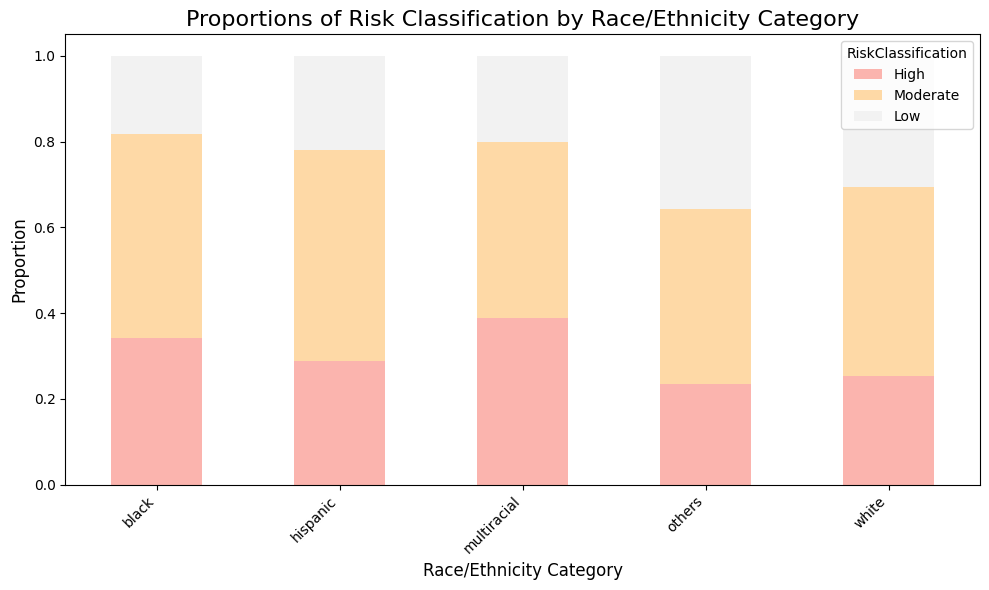

In [10]:
risk_order = ['High', 'Moderate', 'Low']
race_risk_group = df.groupby(['RaceEthnicityCategory', 'RiskClassification']).size().unstack(fill_value=0)
race_risk_group = race_risk_group.reindex(columns=risk_order, fill_value=0)
print('\n', race_risk_group)


race_risk_proportions = race_risk_group.div(race_risk_group.sum(axis=1), axis=0)
print('\n', race_risk_proportions)
race_risk_proportions = race_risk_proportions.fillna(0)



high_moderate_columns = ['High', 'Moderate']
race_risk_total_high_moderate = race_risk_proportions[high_moderate_columns].sum(axis=1)
print('\n', race_risk_total_high_moderate)




race_risk_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')

plt.title('Proportions of Risk Classification by Race/Ethnicity Category', fontsize=16)
plt.xlabel('Race/Ethnicity Category', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conclusion

High risk: Multiracial > Black > Hispanic > White > Others

Moderate risk: Hispanic > Black > White > Multiracial|Others

Low risk: Others > White > Hispanic > Multiracial > Black 


 RiskClassification   High  Moderate    Low
Sex                                       
female              61984    103532  70307
male                56487     94762  57903

 RiskClassification  High  Moderate  Low
Sex                                    
female              0.26      0.44 0.30
male                0.27      0.45 0.28

 Sex
female   0.70
male     0.72
dtype: float64


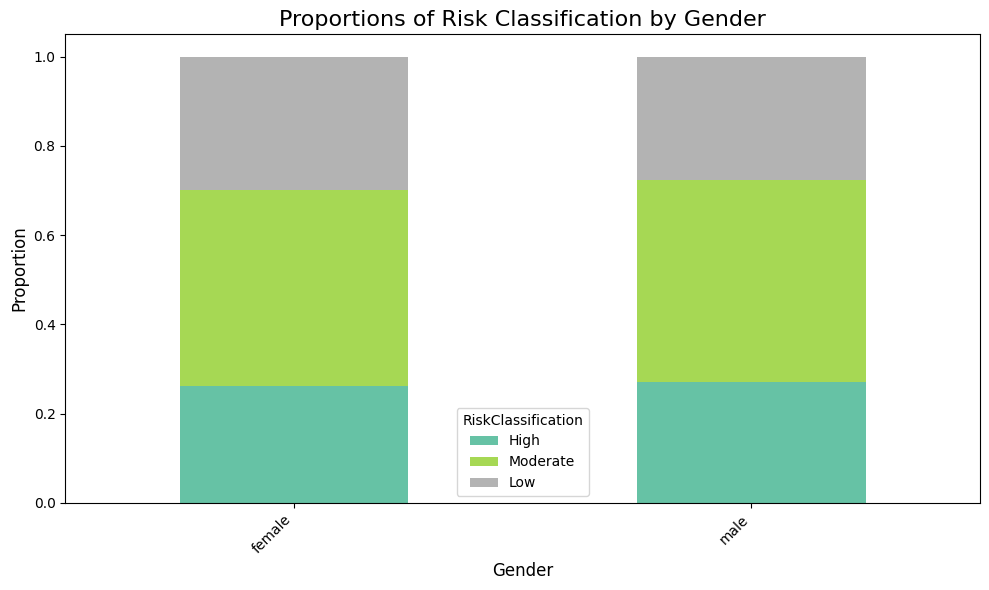

In [11]:
risk_order = ['High', 'Moderate', 'Low']
sex_risk_group = df.groupby(['Sex', 'RiskClassification']).size().unstack(fill_value=0)
sex_risk_group = sex_risk_group.reindex(columns=risk_order, fill_value=0)
print('\n', sex_risk_group)


sex_risk_proportions = sex_risk_group.div(sex_risk_group.sum(axis=1), axis=0)
print('\n', sex_risk_proportions)
sex_risk_proportions = sex_risk_proportions.fillna(0)



high_moderate_columns = ['High', 'Moderate']
sex_risk_total_high_moderate = sex_risk_proportions[high_moderate_columns].sum(axis=1)
print('\n', sex_risk_total_high_moderate)



sex_risk_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Proportions of Risk Classification by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conclusion

Men have higher (moderate + high) risk than women marginally by 0.02%


 RiskClassification           High  Moderate    Low
AgeCategory_Classification                        
middle-aged                 33810     48639  30308
older-adult                 72668    129767  80858
young                       11993     19888  17044

 RiskClassification          High  Moderate  Low
AgeCategory_Classification                     
middle-aged                 0.30      0.43 0.27
older-adult                 0.26      0.46 0.29
young                       0.25      0.41 0.35

 AgeCategory_Classification
middle-aged   0.73
older-adult   0.71
young         0.65
dtype: float64


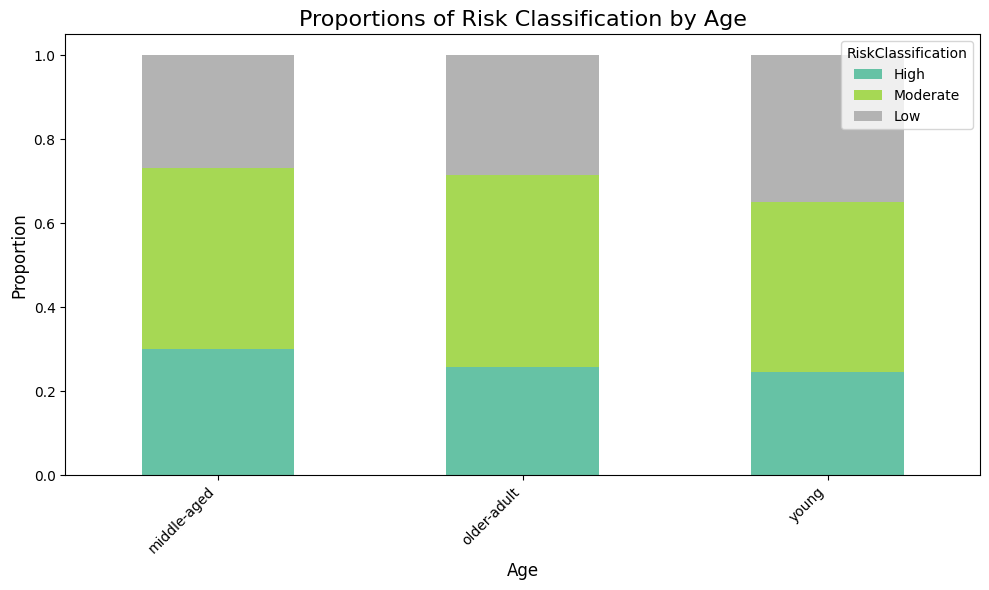

In [12]:
risk_order = ['High', 'Moderate', 'Low']
age_risk_group = df.groupby(['AgeCategory_Classification', 'RiskClassification']).size().unstack(fill_value=0)
age_risk_group = age_risk_group.reindex(columns=risk_order, fill_value=0)
print('\n', age_risk_group)


age_risk_proportions = age_risk_group.div(age_risk_group.sum(axis=1), axis=0)
print('\n', age_risk_proportions)
age_risk_proportions = age_risk_proportions.fillna(0)



high_moderate_columns = ['High', 'Moderate']
age_risk_total_high_moderate = age_risk_proportions[high_moderate_columns].sum(axis=1)
print('\n', age_risk_total_high_moderate)



age_risk_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Proportions of Risk Classification by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conclusion

Middle-aged appear to have highest risk relative to young and older-adults. 

Potential reasons:
- this transitional period in lifespan is when ppl begin experiencing chronic conditions and age-related health changes. because young typically are healthier with fewer health issues whereas older-adults might already be receiving treatment and management for conditions that prevent further prgoression of health risks. 
- often experience combination of risk factors that were accumulated over their lives at this point (eg. smoking, lack of exercise)
- many chronic diseases have a long latency period ie they will take decades to develop
- while interventions are commonly for the older-adult, middle-aged people typically are not targeted for preventive care as much as they should. Unmanaged conditions which increase mortality risk are always detected until later stages. There will also be a lot of masking of early health deterioriation as the middle-aged demographic is also typically people who are actively working or involved in family care. 

#### Misreportings

In [13]:
# New column 'MisreportingFlag' with default value 'None' (for those who aren't misreporting)
df['MisreportingFlag'] = 'None'

# Flagging Under-reporters
df.loc[
    ((df['RiskClassification'] == 'High') | (df['RiskClassification'] == 'Moderate')) & 
    (df['GeneralHealth_numeric'].isin([3, 4, 5])), 
    'MisreportingFlag'
] = 'Under-reporter'

# Flagging Over-reporters
df.loc[
    (df['RiskClassification'] == 'Low') & 
    (df['GeneralHealth_numeric'].isin([1, 2])), 
    'MisreportingFlag'
] = 'Over-reporter'

# Count how many over-reporters and under-reporters there are
misreport_count = df['MisreportingFlag'].value_counts()
print("Count of misreporters (by type):")
print(misreport_count)



# Calculate total number of misreporters (Under-reporters + Over-reporters)
total_misreporters = misreport_count.get('Under-reporter', 0) + misreport_count.get('Over-reporter', 0)
print(f"\nTotal number of mis-reporters: {total_misreporters}")


df['MisreportingFlag_numeric'] = df['MisreportingFlag'].map({'None': 0, 'Under-reporter': 2, 'Over-reporter': 1})


# df.head(10)

Count of misreporters (by type):
MisreportingFlag
Under-reporter    242391
None              196945
Over-reporter       5639
Name: count, dtype: int64

Total number of mis-reporters: 248030


Proportions of misreporters by Race/Ethnicity category:
MisreportingFlag       None  Over-reporter  Under-reporter
RaceEthnicityCategory                                     
black                  0.39           0.01            0.60
hispanic               0.42           0.02            0.56
multiracial            0.41           0.01            0.58
others                 0.49           0.02            0.49
white                  0.45           0.01            0.54


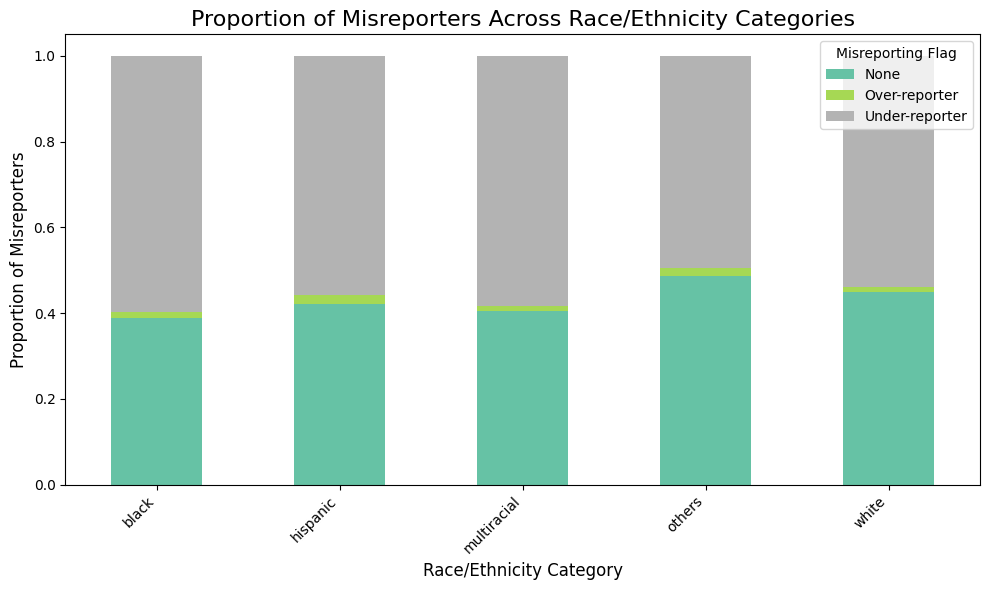

In [14]:
# Group by RaceEthnicityCategory and MisreportingFlag and count occurrences
race_misreport_group = df.groupby(['RaceEthnicityCategory', 'MisreportingFlag']).size().unstack(fill_value=0)

# Normalize the counts to calculate proportions
race_misreport_proportions = race_misreport_group.div(race_misreport_group.sum(axis=1), axis=0)

# Print the proportions to check if the calculations are correct
print("Proportions of misreporters by Race/Ethnicity category:")
print(race_misreport_proportions)

# Plot a stacked bar chart of proportions
race_misreport_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add a title and labels for clarity
plt.title('Proportion of Misreporters Across Race/Ethnicity Categories', fontsize=16)
plt.xlabel('Race/Ethnicity Category', fontsize=12)
plt.ylabel('Proportion of Misreporters', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.legend(title='Misreporting Flag')

# Show the plot
plt.tight_layout()
plt.show()

### Conclusion
Under-reporter: black > multiracial > hispanic > white > others

#### Missing data & their implications

In [15]:
# Extract missing indicator columns
missing_indicator_cols = [col for col in df.columns if '_missing_indicator' in col]

# Calculate the percentage of missing data for each indicator column
missing_data_percentage = df[missing_indicator_cols].mean() * 100

# Sort the indicator columns by the percentage of missing values
missing_data_percentage_sorted = missing_data_percentage.sort_values(ascending=False)
print("Percentage of Missing Data (by indicator):")
print('\n', missing_data_percentage_sorted)


Percentage of Missing Data (by indicator):

 TetanusLast10Tdap_missing_indicator           18.51
PneumoVaxEver_missing_indicator               17.28
HIVTesting_missing_indicator                  14.83
ChestScan_missing_indicator                   12.56
CovidPos_missing_indicator                    11.38
HighRiskLastYear_missing_indicator            11.34
FluVaxLast12_missing_indicator                10.56
AlcoholDrinkers_missing_indicator             10.43
ECigaretteUsage_missing_indicator              7.98
SmokerStatus_missing_indicator                 7.94
DifficultyErrands_missing_indicator            5.73
DifficultyConcentrating_missing_indicator      5.41
DifficultyWalking_missing_indicator            5.36
DifficultyDressingBathing_missing_indicator    5.34
BlindOrVisionDifficulty_missing_indicator      4.81
DeafOrHardOfHearing_missing_indicator          4.61
RaceEthnicityCategory_missing_indicator        3.16
RemovedTeeth_missing_indicator                 2.55
AgeCategory_missing

#### Implications
 HIVtesting_missing_indicator high percentage might be due to privacy concerns, lack of testing, lack of reporting in dataset. An unwilligness to disclose sensitive information about lifestyle choices. Same goes for AlcoholDrinkers_missing_indicator and SmokerStatus_missing_indicator

 Lack of reporting on disability-related indicators like DifficultyErrands_missing_indicator and DifficultyConcentrating_missing_indicator suggest there might be inconsistencies in how respondents interpret the features. Indicates an underreporting of disabilities / functional impairments and/or a need for clearer definitions and increassed awareness about these measures during data collection; unclear survey questions  

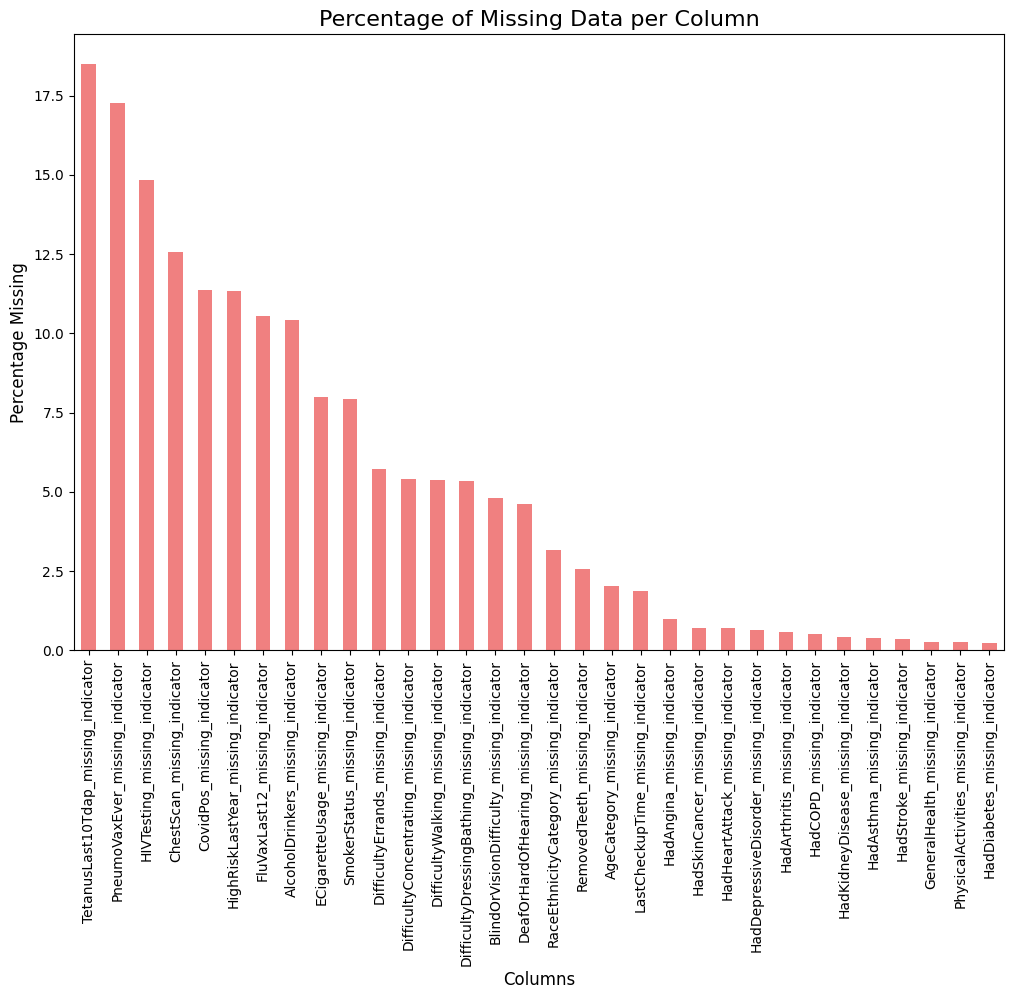

In [16]:
plt.figure(figsize=(12, 8))
missing_data_percentage_sorted.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Missing Data per Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage Missing', fontsize=12)
plt.xticks(rotation=90)
plt.show()


In [17]:
# Calculate the proportion of missing data by Race/Ethnicity Category for each indicator column
missing_by_race = df.groupby('RaceEthnicityCategory')[missing_indicator_cols].mean()

# Print the proportion of missing data by Race/Ethnicity Category
print("Proportion of Missing Data by Race/Ethnicity Category:")
print(missing_by_race)

Proportion of Missing Data by Race/Ethnicity Category:
                       GeneralHealth_missing_indicator  LastCheckupTime_missing_indicator  PhysicalActivities_missing_indicator  RemovedTeeth_missing_indicator  HadHeartAttack_missing_indicator  HadAngina_missing_indicator  HadStroke_missing_indicator  HadAsthma_missing_indicator  HadSkinCancer_missing_indicator  HadCOPD_missing_indicator  HadDepressiveDisorder_missing_indicator  HadKidneyDisease_missing_indicator  HadArthritis_missing_indicator  HadDiabetes_missing_indicator  DeafOrHardOfHearing_missing_indicator  BlindOrVisionDifficulty_missing_indicator  DifficultyConcentrating_missing_indicator  DifficultyWalking_missing_indicator  DifficultyDressingBathing_missing_indicator  DifficultyErrands_missing_indicator  SmokerStatus_missing_indicator  ECigaretteUsage_missing_indicator  RaceEthnicityCategory_missing_indicator  AgeCategory_missing_indicator  ChestScan_missing_indicator  AlcoholDrinkers_missing_indicator  HIVTesting_missi

In [18]:
# Calculate the proportion of missing data for each indicator column by RaceEthnicityCategory
missing_by_race_proportion = df.groupby('RaceEthnicityCategory')[missing_indicator_cols].mean()

# Print the proportions of missing data by Race/Ethnicity category
print("Proportion of Missing Data by Race/Ethnicity Category:")
print(missing_by_race_proportion)

# Plot using Plotly for better readability
fig = px.imshow(missing_by_race_proportion,
                labels=dict(x="Features", y="Race/Ethnicity Category", color="Proportion of Missing Data"),
                x=missing_by_race_proportion.columns,
                y=missing_by_race_proportion.index,
                color_continuous_scale="Viridis")

fig.update_layout(title='Proportion of Missing Data by Race/Ethnicity Category',
                  title_x=0.5, title_y=0.95,
                  width=800, height=600)

fig.show()

Proportion of Missing Data by Race/Ethnicity Category:
                       GeneralHealth_missing_indicator  LastCheckupTime_missing_indicator  PhysicalActivities_missing_indicator  RemovedTeeth_missing_indicator  HadHeartAttack_missing_indicator  HadAngina_missing_indicator  HadStroke_missing_indicator  HadAsthma_missing_indicator  HadSkinCancer_missing_indicator  HadCOPD_missing_indicator  HadDepressiveDisorder_missing_indicator  HadKidneyDisease_missing_indicator  HadArthritis_missing_indicator  HadDiabetes_missing_indicator  DeafOrHardOfHearing_missing_indicator  BlindOrVisionDifficulty_missing_indicator  DifficultyConcentrating_missing_indicator  DifficultyWalking_missing_indicator  DifficultyDressingBathing_missing_indicator  DifficultyErrands_missing_indicator  SmokerStatus_missing_indicator  ECigaretteUsage_missing_indicator  RaceEthnicityCategory_missing_indicator  AgeCategory_missing_indicator  ChestScan_missing_indicator  AlcoholDrinkers_missing_indicator  HIVTesting_missi

In [19]:
# Calculate the correlation of missingness between indicator columns
missing_corr = df[missing_indicator_cols].corr()

# Plot using Plotly for better readability
fig = px.imshow(missing_corr,
                labels=dict(x="Features", y="Missing Features", color="Proportion of Missing Features"),
                x=missing_corr.columns,
                y=missing_corr.index,
                color_continuous_scale="Viridis")

fig.update_layout(title='Proportion of Missing Data',
                  title_x=0.5, title_y=0.95,
                  width=800, height=600)

fig.show()


In [20]:
# Calculate the correlation of missingness between indicator columns
missing_corr = df[missing_indicator_cols].corr()

# Plot using Plotly for better readability
fig_corr = px.imshow(missing_corr,
                     labels=dict(x="Features", y="Features", color="Correlation"),
                     x=missing_corr.columns,
                     y=missing_corr.index,
                     color_continuous_scale="RdBu_r",
                     zmin=-1, zmax=1)  # Adjust color range for correlation (-1 to 1)

fig_corr.update_layout(title='Correlation of Missingness Between Features',
                       title_x=0.5, title_y=0.95,
                       width=800, height=600)

fig_corr.show()


In [21]:
# Investigate missing data in health-related columns by RiskClassification
health_columns_missing = [
    'HadHeartAttack_missing_indicator', 'HadAsthma_missing_indicator', 'HadStroke_missing_indicator', 
    'HadDiabetes_missing_indicator', 'HadCOPD_missing_indicator'
]

# Group by RiskClassification and sum the missing indicators
missing_health_data = df.groupby('RiskClassification')[health_columns_missing].sum()

# Transpose the DataFrame for easier reading
missing_health_data_transposed = missing_health_data.T

# Print the transposed DataFrame for better readability
print("Missing Health Data by RiskClassification (Transposed):")
print(missing_health_data_transposed)


# Normalize the missing data by RiskClassification
missing_health_data_proportion = missing_health_data.div(missing_health_data.sum(axis=1), axis=0)

# Plot the missing data proportions using Plotly
fig_health = px.imshow(missing_health_data_proportion,
                       labels=dict(x="Risk Classification", y="Risk Level", color="Proportion of Missing Data"),
                       x=missing_health_data_proportion.columns,
                       y=missing_health_data_proportion.index,
                       color_continuous_scale="Viridis")

fig_health.update_layout(title='Proportion of Missing Health Data by Risk Classification',
                         title_x=0.5, title_y=0.95,
                         width=800, height=600)

fig_health.show()


Missing Health Data by RiskClassification (Transposed):
RiskClassification                High  Low  Moderate
HadHeartAttack_missing_indicator  1202  610      1248
HadAsthma_missing_indicator        596  492       680
HadStroke_missing_indicator        655  350       547
HadDiabetes_missing_indicator      353  329       400
HadCOPD_missing_indicator          887  462       865


In [22]:
# Analyze missingness by AgeCategory and Sex
missing_by_age_sex = df.groupby(['AgeCategory', 'Sex'])[missing_indicator_cols].sum()
print("Missing Data by Age Category and Sex:")
print(missing_by_age_sex)

Missing Data by Age Category and Sex:
                        GeneralHealth_missing_indicator  LastCheckupTime_missing_indicator  PhysicalActivities_missing_indicator  RemovedTeeth_missing_indicator  HadHeartAttack_missing_indicator  HadAngina_missing_indicator  HadStroke_missing_indicator  HadAsthma_missing_indicator  HadSkinCancer_missing_indicator  HadCOPD_missing_indicator  HadDepressiveDisorder_missing_indicator  HadKidneyDisease_missing_indicator  HadArthritis_missing_indicator  HadDiabetes_missing_indicator  DeafOrHardOfHearing_missing_indicator  BlindOrVisionDifficulty_missing_indicator  DifficultyConcentrating_missing_indicator  DifficultyWalking_missing_indicator  DifficultyDressingBathing_missing_indicator  DifficultyErrands_missing_indicator  SmokerStatus_missing_indicator  ECigaretteUsage_missing_indicator  RaceEthnicityCategory_missing_indicator  AgeCategory_missing_indicator  ChestScan_missing_indicator  AlcoholDrinkers_missing_indicator  HIVTesting_missing_indicator  Fl

In [23]:
# Calculate the count of missing values and total rows for each AgeCategory
missing_by_time = df.groupby('AgeCategory')['LastCheckupTime_missing_indicator'].agg(['sum', 'count'])

# Calculate the proportion of missing data
missing_by_time['proportion_missing'] = (missing_by_time['sum'] / missing_by_time['count']) * 100

# Display results
print("Proportion of Missing Data in LastCheckupTime by Age Category:")
print(missing_by_time[['sum', 'count', 'proportion_missing']])


Proportion of Missing Data in LastCheckupTime by Age Category:
                  sum  count  proportion_missing
AgeCategory                                     
age 18 to 24     1131  26935                4.20
age 25 to 29      784  21990                3.57
age 30 to 34      787  25799                3.05
age 35 to 39      690  28512                2.42
age 40 to 44      670  29928                2.24
age 45 to 49      534  28518                1.87
age 50 to 54      486  33619                1.45
age 55 to 59      431  36804                1.17
age 60 to 64      542  44494                1.22
age 65 to 69      961  56153                1.71
age 70 to 74      393  43467                0.90
age 75 to 79      296  32507                0.91
age 80 or older   596  36249                1.64


_Critical age ranges_

    age 55 to 59 | 431

    age 60 to 64 | 542

    age 65 to 69 | 961



Slow increase in missing data wrt LastCheckupTime from age 55-59 to age 60-64. Mid-life crisis?

Sharp rise noted in missing data regarding LastCheckupTime among individuals aged 65 to 69. 

In [24]:
# Investigate missing data in GeneralHealth and correlate with other features like ComorbidityCount
general_health_missing = df.groupby('ComorbidityCount')['GeneralHealth_missing_indicator'].sum()
print("Missing Data in GeneralHealth by Comorbidity Count:")
print(general_health_missing)


Missing Data in GeneralHealth by Comorbidity Count:
ComorbidityCount
0     300
1     211
2     187
3     162
4     118
5      80
6      44
7      41
8      24
9       8
10     12
11      1
12      1
13      4
14      0
15      0
16      0
Name: GeneralHealth_missing_indicator, dtype: int64


In [25]:
# Investigate missing data in health-related columns by category (e.g., RiskClassification)
health_columns_missing = [
    'HadHeartAttack_missing_indicator', 'HadAsthma_missing_indicator', 'HadStroke_missing_indicator', 
    'HadDiabetes_missing_indicator', 'HadCOPD_missing_indicator'
]

# Group by RiskClassification and calculate missing data sums
missing_health_data = df.groupby('RiskClassification')[health_columns_missing].sum()

# Calculate the total number of entries per RiskClassification category
total_entries = df.groupby('RiskClassification').size()

# Calculate the percentage of missing values by dividing the count of missing values by the total entries
missing_health_data_percentage = missing_health_data.div(total_entries, axis=0) * 100

# Print the result
print("Missing Data in Health-related Features by RiskClassification (as percentages):")
print(missing_health_data_percentage)


Missing Data in Health-related Features by RiskClassification (as percentages):
                    HadHeartAttack_missing_indicator  HadAsthma_missing_indicator  HadStroke_missing_indicator  HadDiabetes_missing_indicator  HadCOPD_missing_indicator
RiskClassification                                                                                                                                                      
High                                            1.01                         0.50                         0.55                           0.30                       0.75
Low                                             0.48                         0.38                         0.27                           0.26                       0.36
Moderate                                        0.63                         0.34                         0.28                           0.20                       0.44


# Investigating the missingness

In [26]:
# Create a correlation matrix for missing data
missing_corr = df[missing_indicator_cols].corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=missing_corr.values,
    x=missing_corr.columns,
    y=missing_corr.index,
    colorscale='Viridis',
    colorbar=dict(title="Correlation Coefficient"),
))

# Update layout for better styling
fig.update_layout(
    title="Correlation of Missing Data Across Columns",
    xaxis_title="Columns",
    yaxis_title="Columns",
    xaxis=dict(tickmode='array', tickvals=np.arange(len(missing_corr.columns)), ticktext=missing_corr.columns),
    yaxis=dict(tickmode='array', tickvals=np.arange(len(missing_corr.index)), ticktext=missing_corr.index),
    autosize=True,
    height=600
)

# Show the plot
fig.show()

note how the missingness is not random. the heatmap has structure a sort of clustered missingness suggesting mb MAR or MNAR. 

In [27]:
df.to_csv('./dataset/Heart_explored.csv', index=False)